In [1]:
import pandas as pd
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path = f'../SI_Toolkit_ASF/Experiments/0_LSTM/Recordings_preprocessed/Train/*.csv'
path = f'../SI_Toolkit_ASF/Experiments/Experiment-5/Recordings_preprocessed/Train/*.csv'

files = glob.glob(path)
dfs = []
for file in files:
    dfs.append(pd.read_csv(file, skiprows=8))
frame = pd.concat(dfs, axis=0, ignore_index=True)
exclude = ['WYPT', 'LIDAR', 'linear_vel_y', 'mu', 'pose_theta_']
frame = frame[[col for col in frame.columns if not any(tmp in col for tmp in exclude)]]
frame.describe()

,time,angular_control,translational_control,angular_vel_z,linear_vel_x,pose_theta,pose_x,pose_y,slip_angle,steering_angle,experiment_index,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle,D_car_pose_x,D_car_pose_y
count,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000,220183.000000
mean,200.169445,-0.003670,4.367794,-0.018617,4.048597,-7.760441,10.375949,-3.410630,-0.000504,-0.003264,123.090525,0.011065,-0.029229,-0.018096,0.912898,-0.025844,0.001182,-0.001297,3.936620,0.001319
std,115.629711,0.386006,1.973502,2.385007,1.695450,51.494460,44.654942,55.584949,0.143473,0.247505,72.160933,3.069783,3.100147,2.361233,3.949240,15.863842,0.848210,1.670987,1.609050,0.974354
min,0.000000,-1.630411,1.000807,-11.237261,1.001398,-163.637070,-112.485180,-198.825160,-0.785120,-0.450841,0.000000,-7.766132,-7.908160,-11.185455,-9.010005,-49.984520,-2.999377,-3.200000,0.000000,-3.998429
25%,99.720000,-0.256176,2.668434,-1.627631,2.662841,-40.275379,-18.722956,-28.904516,-0.062209,-0.190413,61.000000,-2.242625,-2.314310,-1.613688,-0.000262,-7.902350,-0.412875,-0.594458,2.634776,-0.257808
50%,200.360000,-0.003804,4.350015,-0.038090,3.975194,-4.750471,9.463944,-0.126204,-0.000263,-0.005045,123.000000,0.014514,-0.053024,-0.040615,0.181103,-0.000960,0.001259,0.000000,3.892318,0.000479
75%,300.720000,0.246459,5.990728,1.576256,5.365664,22.011062,37.765596,27.719428,0.061475,0.182825,186.000000,2.253084,2.257681,1.561260,1.887226,7.841812,0.420145,0.592248,5.155813,0.268661
max,399.960000,1.683602,7.999737,9.940139,7.941545,155.970800,166.678530,192.270320,0.777421,0.450893,271.000000,7.892227,7.894969,9.818292,9.010005,49.963345,2.999945,3.200000,7.932743,3.999665


In [3]:
len(frame)

220183

In [4]:
frame.groupby('experiment_index').size().describe()

count     269.000000
mean      818.524164
std       311.232259
min        32.000000
25%       637.000000
50%       819.000000
75%      1027.000000
max      1640.000000
dtype: float64

In [5]:
# for df in dfs:
#     print(df.groupby('experiment_index').size())

# Some Plots

<AxesSubplot:>

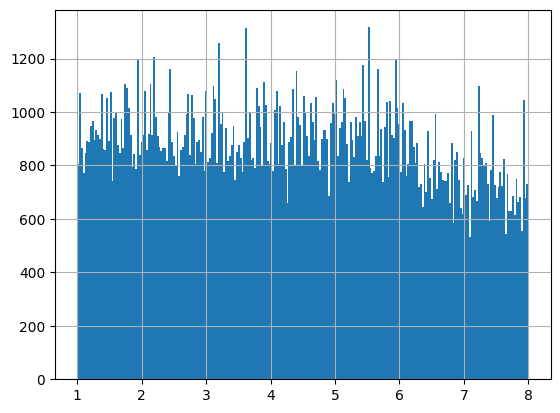

In [6]:
frame.translational_control.hist(bins=250)

<AxesSubplot:>

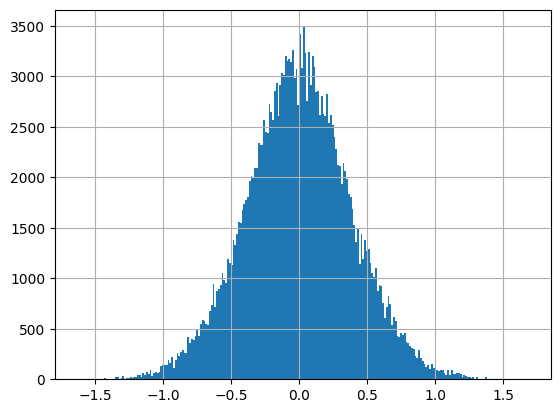

In [7]:
frame.angular_control.hist(bins=250)

<AxesSubplot:>

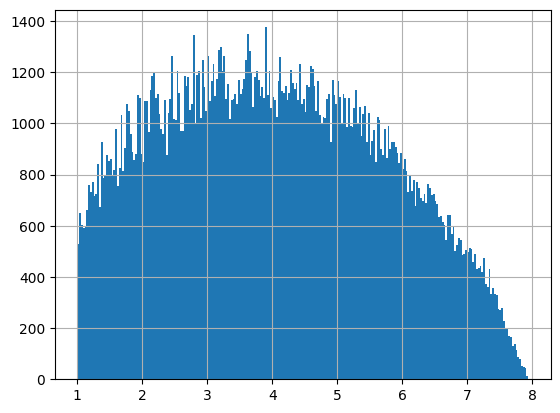

In [8]:
frame.linear_vel_x.hist(bins=250)

<AxesSubplot:>

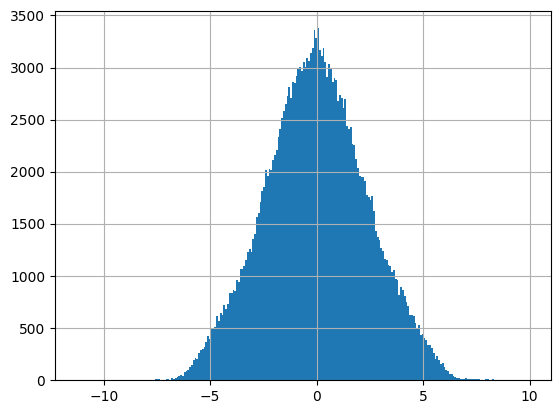

In [9]:
frame.angular_vel_z.hist(bins=250)

<AxesSubplot:>

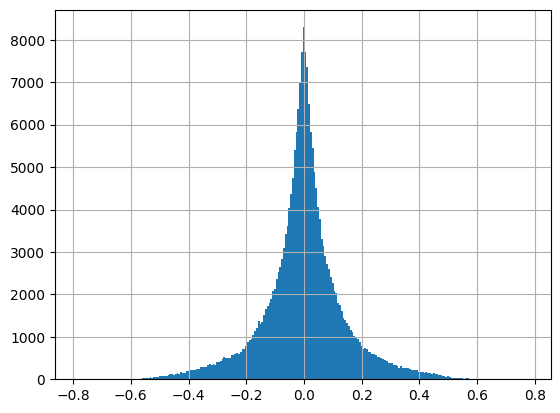

In [10]:
frame.slip_angle.hist(bins=250)

In [ ]:
frame.slip_angle.hist(bins=250, log=True)

<AxesSubplot:>

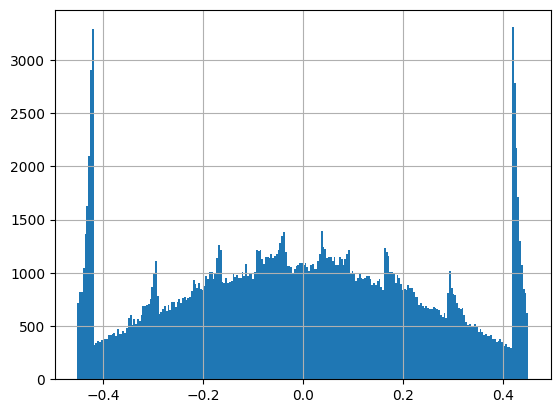

In [11]:
frame.steering_angle.hist(bins=250)

## Delta values

In [12]:
delta_frame = frame[frame.time != 0.00]

<AxesSubplot:>

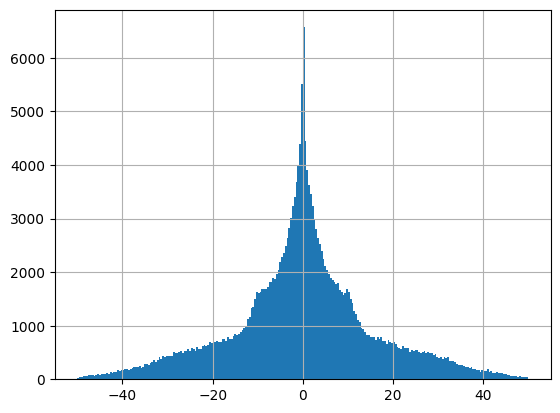

In [13]:
delta_frame.D_angular_vel_z.hist(bins=250)

<AxesSubplot:>

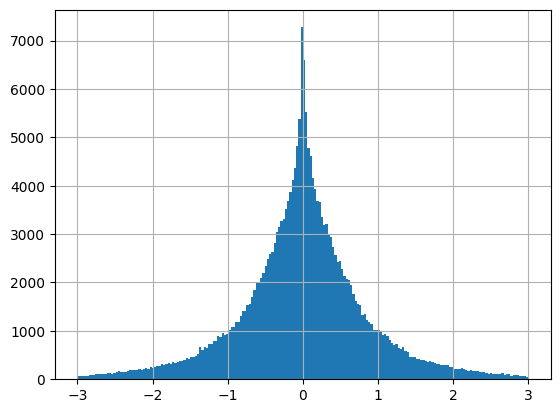

In [14]:
delta_frame.D_slip_angle.hist(bins=200)

<AxesSubplot:>

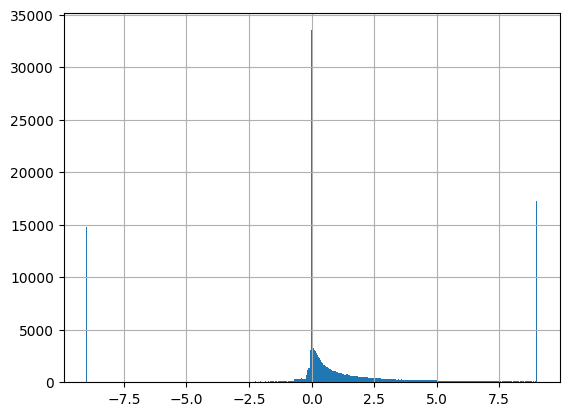

In [15]:
delta_frame.D_linear_vel_x.hist(bins=500)

<AxesSubplot:>

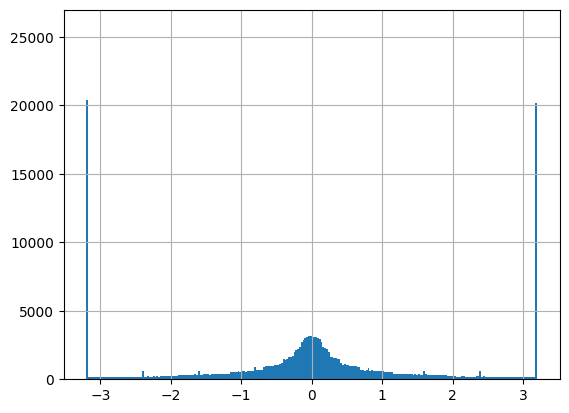

In [16]:
delta_frame.D_steering_angle.hist(bins=250)
# plt.ylim((0, 1000))

# Explore D_linear_vel_x

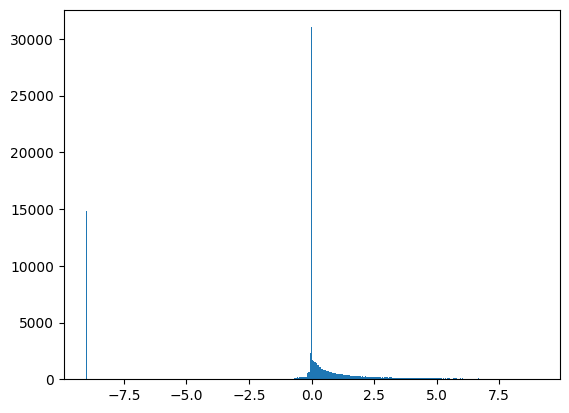

In [17]:
hist = plt.hist(delta_frame.D_linear_vel_x, bins=1000)

In [18]:
hist[1][40:60]

array([-8.2892046 , -8.27118459, -8.25316458, -8.23514457, -8.21712456,
       -8.19910455, -8.18108454, -8.16306453, -8.14504452, -8.12702451,
       -8.1090045 , -8.09098449, -8.07296448, -8.05494447, -8.03692446,
       -8.01890445, -8.00088444, -7.98286443, -7.96484442, -7.94682441])

<AxesSubplot:>

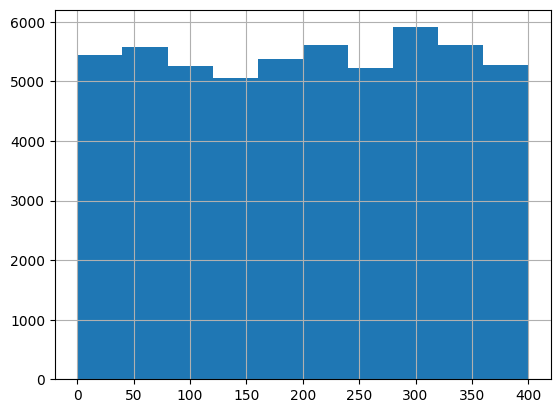

In [19]:
delta_frame[delta_frame.D_linear_vel_x.between(-0.01, 0.0)].time.hist()

# Explore dependencies

<AxesSubplot:xlabel='angular_vel_z', ylabel='D_angular_vel_z'>

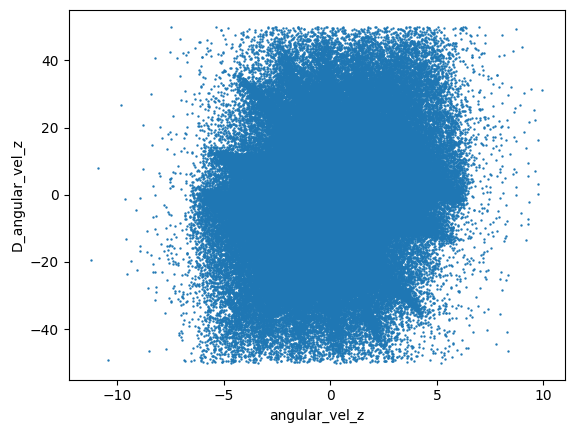

In [20]:
delta_frame.plot.scatter(x='angular_vel_z', y='D_angular_vel_z', s=0.5)

<AxesSubplot:xlabel='linear_vel_x', ylabel='D_linear_vel_x'>

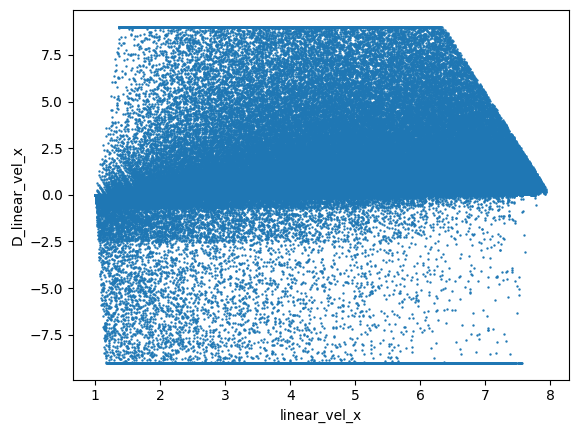

In [21]:
delta_frame.plot.scatter(x='linear_vel_x', y='D_linear_vel_x', s=0.5)

<AxesSubplot:xlabel='slip_angle', ylabel='D_slip_angle'>

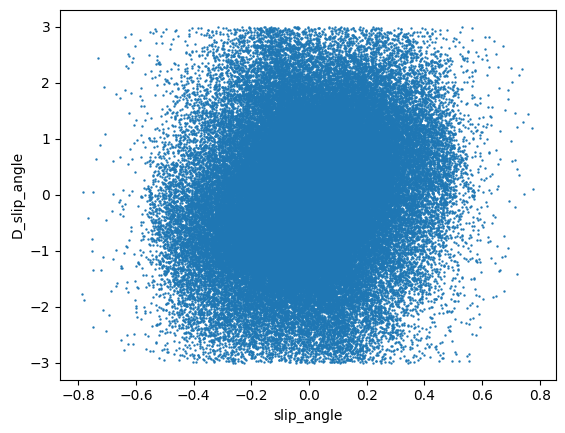

In [22]:
delta_frame.plot.scatter(x='slip_angle', y='D_slip_angle', s=0.5)

<AxesSubplot:xlabel='angular_vel_z', ylabel='slip_angle'>

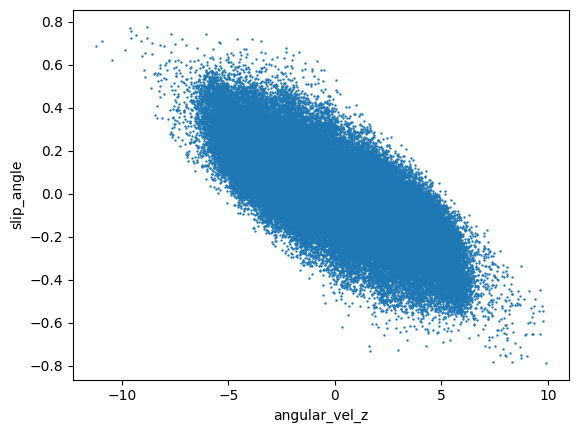

In [23]:
delta_frame.plot.scatter(x='angular_vel_z', y='slip_angle', s=0.5)

# Explore linear velocity

In [24]:
# frame[frame.D_linear_vel_x > 9.01]

In [25]:
# high_D_lin = frame[frame.experiment_index == 2530]
# high_D_lin

# Explore slip angle

In [26]:
frame[frame.slip_angle.between(-0.01, 0.01)].groupby('experiment_index').size()

experiment_index
0      130
1      115
2      119
3      124
4      118
      ... 
265      5
267      9
269      3
270     19
271      7
Length: 269, dtype: int64

In [27]:
frame.groupby('experiment_index').size()

experiment_index
0      1080
1       870
2      1192
3      1048
4      1042
       ... 
265      34
267      32
269      33
270     196
271      41
Length: 269, dtype: int64

In [28]:
no_slip = frame[frame.slip_angle.between(-0.005, 0.005)].groupby('experiment_index').size() 
no_slip_diff = (no_slip / frame.groupby('experiment_index').size().reindex(no_slip.index) * 100).sort_values(ascending=False)
no_slip_diff

experiment_index
267    15.625000
271    14.634146
159    10.139165
251    10.121457
262     9.917355
         ...    
269     3.030303
193     2.960969
131     2.631579
259     2.521008
249     1.746725
Length: 269, dtype: float64

In [29]:
frame[frame.experiment_index.isin(no_slip_diff.iloc[0:25].index)]

,time,angular_control,translational_control,angular_vel_z,linear_vel_x,pose_theta,pose_x,pose_y,slip_angle,steering_angle,experiment_index,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle,D_car_pose_x,D_car_pose_y
216,11.20,-0.446101,1.138027,0.455468,1.361794,8.966195,-4.173586,-15.605627,0.037657,0.113590,5,-1.231658,0.590611,0.449896,-0.171626,0.157571,0.738227,-0.015797,1.365854,0.015639
217,11.24,-0.446101,1.138027,0.093605,1.200503,8.981575,-4.221183,-15.584556,0.017670,-0.014410,5,-1.189923,0.526786,0.384498,-4.032278,-9.046598,-0.499681,-3.200000,1.300860,0.034392
218,11.28,-0.446101,1.138027,-0.360796,1.155470,8.978456,-4.263982,-15.564324,-0.029379,-0.142410,5,-1.069987,0.505781,-0.077987,-1.125813,-11.360014,-1.176214,-3.200000,1.183493,0.005626
219,11.32,-0.446101,1.138027,-0.770860,1.142897,8.957911,-4.304328,-15.542185,-0.082276,-0.263887,5,-1.008642,0.553489,-0.513601,-0.314331,-10.251602,-1.322433,-3.036911,1.149820,-0.040276
220,11.36,-0.446101,1.138027,-1.065926,1.139386,8.922074,-4.342530,-15.517191,-0.125007,-0.336773,5,-0.955057,0.624847,-0.895929,-0.087762,-7.376641,-1.068262,-1.822147,1.137950,-0.087400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218066,267.84,0.299140,6.206501,3.872257,6.087612,15.025895,8.261584,167.523880,-0.258178,0.294003,151,-3.219771,5.143738,3.848147,0.653315,1.263595,-1.035945,0.085628,5.742025,-1.963189
218067,267.88,0.299140,6.206501,3.900108,6.109035,15.181414,8.109084,167.713930,-0.290110,0.296058,151,-3.812504,4.751205,3.887963,0.535583,0.696266,-0.798291,0.051376,5.683820,-2.191650
218068,267.92,0.299140,6.206501,3.919986,6.126598,15.337876,7.933194,167.883710,-0.314616,0.297291,151,-4.397249,4.244614,3.911567,0.439072,0.496948,-0.612669,0.030827,5.634799,-2.366767
218069,267.96,0.415405,6.206501,3.937664,6.140996,15.495069,7.735618,168.028730,-0.333527,0.298031,151,-4.939401,3.625488,3.929830,0.359964,0.441968,-0.472756,0.018495,5.593914,-2.499996
